## Doctor Right


#### Import Library

In [1]:
import sys
sys.path.append("../modules")
from eda import EDAAnalyzer
from spark_session import SparkManager
from feature_engineering import FeatureEngineer

In [2]:
# Load autoreload extension
%load_ext autoreload
%autoreload 2

#### Constants and config

In [3]:
mx_submits_path = "../data_sample/mx_submits.parquet/"
mx_submits_line_path = "../data_sample/mx_submitsline.parquet/"


sample_patient_id = "8aad41f612a7095449888c8050abaeb05fdee65643caa3033542610421d8bd1daaa2c4ce1757401003a1bbcd60948a7aa13eba507a676dea80e0cf76b77dbc95"
exclude_cols = ['claim_number',
'claim_id',
'servicelines',
'claim_all_diagnosis_codes',
'rendering_provider_npi',
'rendering_provider_name',
'facility_provider_npi',
'claim_total_charge_amount',
'organization_sourced_npi',
'referring_provider_npi',
'referring_provider_name',
'rendering_provider_current_practice_organization_id',
'rendering_provider_current_practice_organization_name',
'billing_provider_npi',
'organization_id',
'organization_name',
'billing_provider_address_key',
'billing_provider_address_street',
'billing_provider_address_longitude',
'billing_provider_address_latitude',
'referring_provider_current_practice_organization_id',
'primary_payer_name_raw_source_value',
'referring_provider_current_practice_organization_name',
'facility_provider_address_longitude',
'facility_provider_address_latitude',
'facility_provider_address_key',
'facility_provider_address_street',
'principal_diagnosis_description',
'billing_provider_address_zipcode',
'cohort_record_id',
'patient_id',
'principal_procedure_description',
'patient_location_preferred_zipcode',
'attending_provider_npi',
'primary_payer_id_raw_source_value',
'operating_provider_npi',
'secondary_payer_name_raw_source_value',
'facility_provider_address_county',
'facility_provider_address_suite',
'patient_location_residential_zip3',
'billing_provider_address_cbsa_name',
'facility_provider_address_cbsa_name']

### Spark Session

In [4]:
mx_submits_spark_manager = SparkManager(mx_submits_path)
mx_submits_line_spark_manager = SparkManager(mx_submits_line_path)

24/10/01 02:16:56 WARN Utils: Your hostname, Sureshs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 172.20.9.214 instead (on interface en0)
24/10/01 02:16:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/01 02:16:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### MX SUBMITS

#### EDA

In [5]:
mx_submits_eda = EDAAnalyzer(mx_submits_spark_manager)

In [6]:
mx_submits_eda.display_head()

24/09/30 14:25:00 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,claim_number,cohort_key,cohort_record_id,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,...,type_of_bill_frequency_description,vendorname,cycle_id,patient_birth_year,patient_gender,patient_id,patient_location_preferred_latitude,patient_location_preferred_longitude,patient_location_preferred_zipcode,patient_location_preferred_type
0,a6db914db401522b72e75765b0c8915a,f74909ace68e51891440e4da0b65a70c,323f1fff09390aad4c11c4e3c3d694fe,None,"LAS VEGAS-HENDERSON-PARADISE, NV",Henderson,Clark,3005WHORIZONRIDGEPKWYHENDERSONNV89052,35.998154,-115.119797,...,None,cyan,full_20240611,1944,M,e0e2f2ab3660008f963219f5da377d1e16b302a936951c...,None,None,None,NaN
1,28cd641bca90ccc956666d3d427208f2,6e116682aeba6cd8a5341a9bc3b6f020,da4a4cff3fb363e215eca0779812b117,None,"PARSONS, KS",Parsons,Labette,1902SUSHIGHWAY59PARSONSKS67357,37.320053,-95.264801,...,Admit Through Discharge Claim,cyan,full_20240611,1943,F,64bf854d4bc6350af1c5edc74fe816d23d9d9ecc965cae...,37.676598,-95.472107,66720,1.0
2,7c2a727611dca1435166631a665b7f21,767ef4cac69e8a0c77384f6e1414364b,f4048466449529193e43c6231c6b4f80,None,"PHILADELPHIA-CAMDEN-WILMINGTON, PA-NJ-DE-MD",Woodbury,Gloucester,26EREDBANKAVEWOODBURYNJ08096,39.843605,-75.148361,...,Admit Through Discharge Claim,cyan,full_20240611,1971,M,be3296ca5e261d0300048ece4a74ce6d775f3449a77702...,40.227833,-75.240562,19454,1.0
3,6d014626abbddd193950839be7859c43,0e6b9e4a0d9103c5a9c4f1332d38ef53,781bac90c394b3566e29c81dc925ed3d,None,"MONTGOMERY, AL",Montgomery,Montgomery,2055NORMANDIEDRMONTGOMERYAL36111,32.328972,-86.27977,...,Admit Through Discharge Claim,cyan,full_20240611,1946,F,0025ac2b4ff09bd1505307140b30a7c7f53f9645efa5f4...,32.902707,-85.382338,36855,2.0
4,dfd62d19b9ec0891cf714d5d486736d,767ef4cac69e8a0c77384f6e1414364b,adf9dafa1dc75bec5f501c724d275b46,None,"AUSTIN-ROUND ROCK-GEORGETOWN, TX",Austin,Travis,2170WOODWARDSTAUSTINTX78744,30.212395,-97.745186,...,None,cyan,full_20240611,1996,M,59baeef7b06d85ab2f180a860201c2c1e8c931d48b614c...,40.742847,-82.530979,44903,1.0


In [7]:
mx_submits_eda.display_shape()

'Shape of data: rows: 247334, cols: 127'

#### Type conversion

In [8]:
mx_submits_eda.convert_columns_to_float(["claim_total_charge_amount"])

Casted claim_total_charge_amount to float


In [6]:
column_info_submits = mx_submits_eda.display_column_info()
column_info_submits.to_csv("../output/column_info_submits.csv")
column_info_submits

24/09/29 17:51:08 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,Column Name,Non-null Count,Percent Non-null,Min Value,Max Value,Max Repeats,Sample,Data Type,most_frequent_value,max_repeats,distinct_count
0,claim_number,247334,100.000000,28,32,1.0,a6db914db401522b72e75765b0c8915a,string,4182b93e71c2c46d88683dd749d3cc04,1.0,247334
1,vendorname,247334,100.000000,4,4,247334.0,cyan,string,cyan,247334.0,1
2,clearinghouse_received_date,247334,100.000000,2015-01-02,2024-09-06,4037.0,2019-09-05,date,2018-02-03,4037.0,3531
3,cohort_key,247334,100.000000,32,32,62351.0,f74909ace68e51891440e4da0b65a70c,string,f74909ace68e51891440e4da0b65a70c,62351.0,4
4,claim_id,247334,100.000000,28,32,1.0,a6db914db401522b72e75765b0c8915a,string,a34f778795a121c257567fd41ffe839e,1.0,247334
...,...,...,...,...,...,...,...,...,...,...,...
122,secondary_payer_plan_type,2542,1.027760,7,20,244792.0,None,string,None,244792.0,8
123,operating_provider_npi,2026,0.819135,10,10,245308.0,None,string,None,245308.0,1100
124,inpatient_admitting_diagnosis_code,1828,0.739082,2,7,245506.0,None,string,None,245506.0,526
125,drg_code,777,0.314150,3,9,246557.0,None,string,None,246557.0,295


In [10]:
column_info_submits[column_info_submits["Column Name"]=="claim_total_charge_amount"]

,Column Name,Non-null Count,Percent Non-null,Min Value,Max Value,Max Repeats,Sample,Data Type,most_frequent_value,max_repeats
14,claim_total_charge_amount,246797,99.782885,-203.160004,924144.125,3212.0,23135.0,float,150.0,3212.0


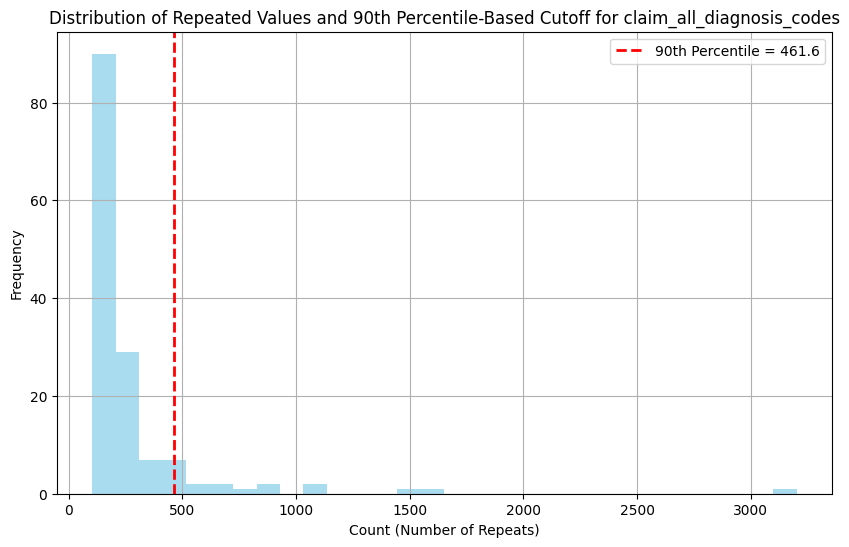

In [11]:
mx_submits_eda.plot_percentile_based_cutoff("claim_all_diagnosis_codes",90,cutoff_length=5)

In [12]:
mx_submits_claim_all_diagnosis_codes_repeat_count = mx_submits_eda.get_top_n_repeated_values("claim_all_diagnosis_codes")
mx_submits_claim_all_diagnosis_codes_repeat_count

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5.0
1,"(ICD10, I10, 1)",4651,I10,3.0
2,"(ICD10, I10, 2)",4584,I10,3.0
3,"(ICD10, Z0000, 1)",3802,Z0000,5.0
4,"(ICD10, I10, 3)",3740,I10,3.0
...,...,...,...,...
46888,"(None, 79902, 14)",1,79902,5.0
46889,"(ICD10, L919, 1)",1,L919,4.0
46890,"(ICD10, R32, 13)",1,R32,3.0
46891,"(ICD10, F429, 10)",1,F429,4.0


In [13]:
most_repeated_diagnosis = mx_submits_claim_all_diagnosis_codes_repeat_count[
    (mx_submits_claim_all_diagnosis_codes_repeat_count["diagnosis_code_length"] == 5) & 
    (mx_submits_claim_all_diagnosis_codes_repeat_count["count"] > 461)
]
most_repeated_diagnosis_list = most_repeated_diagnosis['diagnosis_code'].tolist()
most_repeated_diagnosis

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5.0
3,"(ICD10, Z0000, 1)",3802,Z0000,5.0
5,"(ICD10, F1120, 1)",3573,F1120,5.0
13,"(ICD10, Z1231, 1)",1944,Z1231,5.0
14,"(ICD10, R6889, 1)",1935,R6889,5.0
28,"(ICD10, Z1211, 1)",1202,Z1211,5.0
29,"(ICD10, I2510, 1)",1152,I2510,5.0
43,"(ICD10, R0602, 1)",956,R0602,5.0
48,"(ICD10, M6281, 2)",889,M6281,5.0
57,"(ICD10, R0789, 1)",800,R0789,5.0


In [14]:
most_repeated_diagnosis = mx_submits_claim_all_diagnosis_codes_repeat_count[mx_submits_claim_all_diagnosis_codes_repeat_count["count"]>=531]
most_repeated_diagnosis

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5.0
1,"(ICD10, I10, 1)",4651,I10,3.0
2,"(ICD10, I10, 2)",4584,I10,3.0
3,"(ICD10, Z0000, 1)",3802,Z0000,5.0
4,"(ICD10, I10, 3)",3740,I10,3.0
...,...,...,...,...
98,"(ICD10, J441, 1)",544,J441,4.0
99,"(ICD10, J189, 1)",540,J189,4.0
100,"(ICD10, Z452, 1)",539,Z452,4.0
101,"(ICD10, F4323, 1)",534,F4323,5.0


 - (ICD10, Z0001, 1): Encounter for general adult medical examination with abnormal findings
 - (ICD10, F4323, 1): Adjustment disorder with depressed mood
 - (ICD10, Z452, 1)	: Pneumonia, unspecified organism
 - (ICD10, J441, 1)	: Chronic obstructive pulmonary disease with acute exacerbation

In [15]:
mx_submits_eda.get_top_n_repeated_values("claim_all_diagnosis_codes",5)

,claim_all_diagnosis_codes,count,diagnosis_code,diagnosis_code_length
0,"(ICD10, G4733, 1)",4880,G4733,5
1,"(ICD10, I10, 1)",4651,I10,3
2,"(ICD10, I10, 2)",4584,I10,3
3,"(ICD10, Z0000, 1)",3802,Z0000,5
4,"(ICD10, I10, 3)",3740,I10,3


In [16]:
type_of_bill_facility_description_eda = mx_submits_eda.get_fill_counts_for_unique_values("type_of_bill_facility_description")
type_of_bill_facility_description_eda

,Unique Value,Column,type_count,Non-null Count,Percent Non-null
0,Skilled Nursing,claim_number,721,721,100.000000
1,Skilled Nursing,cohort_key,721,721,100.000000
2,Skilled Nursing,cohort_record_id,721,721,100.000000
3,Skilled Nursing,attending_provider_npi,721,112,15.533981
4,Skilled Nursing,billing_provider_address_cbsa_name,721,465,64.493759
...,...,...,...,...,...
877,None,patient_id,213257,213244,99.993904
878,None,patient_location_preferred_latitude,213257,188763,88.514328
879,None,patient_location_preferred_longitude,213257,188763,88.514328
880,None,patient_location_preferred_zipcode,213257,188763,88.514328


In [17]:
type_of_bill_facility_description_eda[type_of_bill_facility_description_eda["Column"]=='facility_provider_address_city']

,Unique Value,Column,type_count,Non-null Count,Percent Non-null
37,Skilled Nursing,facility_provider_address_city,721,5,0.693481
163,Intermediate Care,facility_provider_address_city,10,0,0.000000
289,Hospital,facility_provider_address_city,23494,457,1.945177
415,Home Health,facility_provider_address_city,2873,0,0.000000
541,"Specialty Facility, Hospital ASC Surgery",facility_provider_address_city,2196,202,9.198543
667,Clinic,facility_provider_address_city,4783,651,13.610705
793,None,facility_provider_address_city,213257,78679,36.893982


### MX SUBMITS LINE

#### EDA

In [6]:
mx_submits_line_eda = EDAAnalyzer(mx_submits_line_spark_manager)

In [19]:
mx_submits_line_eda.display_head()

,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,billing_provider_address_precision,billing_provider_address_region,billing_provider_address_state,...,line_level_procedure_modifier_1,line_level_procedure_modifier_2,line_level_procedure_modifier_3,line_level_procedure_modifier_4,line_level_procedure_category,line_level_revenue_code,line_level_revenue_description,line_level_from_date,line_level_to_date,line_level_units_billed
0,None,"LITTLE ROCK-NORTH LITTLE ROCK-CONWAY, AR",Little Rock,Pulaski,4301WMARKHAMSTLITTLEROCKAR72205,34.748756,-92.320251,Rooftop,South,AR,...,25,None,None,None,EVALUATION AND MANAGEMENT - OFFICE/OTHER OUTPA...,None,None,2019-11-07,2019-11-07,1.00
1,None,"LITTLE ROCK-NORTH LITTLE ROCK-CONWAY, AR",Little Rock,Pulaski,4301WMARKHAMSTLITTLEROCKAR72205,34.748756,-92.320251,Rooftop,South,AR,...,None,None,None,None,"MEDICINE - VACCINES, TOXOIDS",None,None,2019-11-07,2019-11-07,1.00
2,None,"LITTLE ROCK-NORTH LITTLE ROCK-CONWAY, AR",Little Rock,Pulaski,4301WMARKHAMSTLITTLEROCKAR72205,34.748756,-92.320251,Rooftop,South,AR,...,None,None,None,None,"MEDICINE - VACCINES, TOXOIDS",None,None,2019-11-07,2019-11-07,1.00
3,None,"LITTLE ROCK-NORTH LITTLE ROCK-CONWAY, AR",Little Rock,Pulaski,4301WMARKHAMSTLITTLEROCKAR72205,34.748756,-92.320251,Rooftop,South,AR,...,None,None,None,None,None,None,None,2019-11-07,2019-11-07,1.00
4,None,"LITTLE ROCK-NORTH LITTLE ROCK-CONWAY, AR",Little Rock,Pulaski,4301WMARKHAMSTLITTLEROCKAR72205,34.748756,-92.320251,Rooftop,South,AR,...,None,None,None,None,None,None,None,2019-11-07,2019-11-07,1.00


In [20]:
mx_submits_line_eda.display_shape()

'Shape of data: rows: 649030, cols: 150'

In [21]:
column_info_submits_line = mx_submits_line_eda.display_column_info()
column_info_submits_line.to_csv("../output/column_info_submits_line.csv")
column_info_submits_line

,Column Name,Non-null Count,Percent Non-null,Min Value,Max Value,Max Repeats,Sample,Data Type,most_frequent_value,max_repeats
0,cohort_record_id,649030,100.000000,32,32,6206.0,59439e5392ede3f442d6b455577f1e0a,string,4f0998de6738ac4b3baa08f553f2d539,6206.0
1,source_increment_id,649030,100.000000,8,8,387019.0,20210630,string,20210630,387019.0
2,claim_number,649030,100.000000,28,32,265.0,b85ed94c7fb1b3a06403eb68e4948b1d,string,61da5a13bb57c242743ed5551a63230e,265.0
3,clearinghouse_received_date,649030,100.000000,2015-01-02,2024-09-06,26287.0,2019-11-18,date,2018-02-03,26287.0
4,cohort_key,649030,100.000000,32,32,164342.0,f74909ace68e51891440e4da0b65a70c,string,767ef4cac69e8a0c77384f6e1414364b,164342.0
...,...,...,...,...,...,...,...,...,...,...
145,secondary_payer_plan_type,12519,1.928878,7,20,636511.0,None,string,None,636511.0
146,drg_code,11557,1.780657,3,9,637473.0,None,string,None,637473.0
147,line_level_procedure_modifier_3,6606,1.017827,2,2,642424.0,None,string,None,642424.0
148,line_level_procedure_modifier_4,650,0.100149,2,2,648380.0,None,string,None,648380.0


### Feature Engineering

In [6]:
mx_submits_fe=FeatureEngineer(mx_submits_spark_manager)

In [23]:
mx_submits_fe.add_comorbidities_array()

Initial DataFrame - Shape: 247334 rows, 127 columns
DataFrame After Window Function - Shape: 247334 rows, 128 columns


In [14]:
mx_submits_fe.add_comorbidities_with_exponential_decay_sparse_vector()

DataFrame After Adding Previous Diagnosis OHE with Exponential Decay - Shape: 247334 rows, 130 columns


In [15]:
mx_submits_fe.display_head()

,claim_number,cohort_key,cohort_record_id,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,...,patient_birth_year,patient_gender,patient_id,patient_location_preferred_latitude,patient_location_preferred_longitude,patient_location_preferred_zipcode,patient_location_preferred_type,diagnosis_code_date,previous_comorbidities_with_dates,previous_diagnosis_ohe
0,2fe327bca0850edae185999da41baf70,0e6b9e4a0d9103c5a9c4f1332d38ef53,a185516c0d4174b85e4e3a3b1c2e073a,None,None,None,None,None,None,None,...,1981,F,000b598b928c9a37e50d0364c780275db880fe5d3c313c...,36.869514,-76.032600,23454,1,"[(2449, 2015-01-22)]",[],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,f076c4d6a85015d6efc8be0c32ad008c,0e6b9e4a0d9103c5a9c4f1332d38ef53,a185516c0d4174b85e4e3a3b1c2e073a,None,None,None,None,None,None,None,...,1981,F,000b598b928c9a37e50d0364c780275db880fe5d3c313c...,36.869514,-76.032600,23454,1,"[(2449, 2015-01-27)]","[(2449, 2015-01-22)]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,b8fdef775506c6613d5e443dde13ce96,0e6b9e4a0d9103c5a9c4f1332d38ef53,a185516c0d4174b85e4e3a3b1c2e073a,None,None,None,None,None,None,None,...,1981,F,000b598b928c9a37e50d0364c780275db880fe5d3c313c...,36.869514,-76.032600,23454,1,"[(V259, 2015-02-13), (6264, 2015-02-13), (6253...","[(2449, 2015-01-22), (2449, 2015-01-27)]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,7aeb520d6c5b67ada74d43688701199d,0e6b9e4a0d9103c5a9c4f1332d38ef53,a185516c0d4174b85e4e3a3b1c2e073a,None,None,None,None,None,None,None,...,1981,F,000b598b928c9a37e50d0364c780275db880fe5d3c313c...,36.869514,-76.032600,23454,1,"[(37405, 2015-03-20), (37302, 2015-03-20)]","[(2449, 2015-01-22), (2449, 2015-01-27), (V259...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2bb2290c406277548168b0c9e2306a9d,0e6b9e4a0d9103c5a9c4f1332d38ef53,a185516c0d4174b85e4e3a3b1c2e073a,None,None,None,None,None,None,None,...,1981,F,000b598b928c9a37e50d0364c780275db880fe5d3c313c...,36.869514,-76.032600,23454,1,"[(37515, 2015-05-11), (36330, 2015-05-11)]","[(2449, 2015-01-22), (2449, 2015-01-27), (V259...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [24]:
mx_submits_fe.remove_diagnosis_codes(most_repeated_diagnosis_list)

DataFrame After Removing Diagnosis Codes - Shape: 230587 rows, 128 columns


In [6]:
# mx_submits_fe.calculate_first_visit_and_duration()
# mx_submits_fe.get_min_max("first_visit_date")
# mx_submits_fe.get_min_max("days_since_first_visit")
# mx_submits_fe.add_train_test_indicator()

In [6]:
mx_submits_fe.add_continuous_visit_years()
mx_submits_fe.get_top_n_counts("continuous_visit_years")

,continuous_visit_years,count,percent
0,1,224597,90.807168
1,2,19491,7.880437
2,3,2506,1.013205
3,4,530,0.214285
4,5,115,0.046496


In [16]:
sample_patient_info = mx_submits_fe.get_rows_by_column_value("patient_id",sample_patient_id)
sample_patient_info.to_csv("../output/sample_patient_info.csv")
sample_patient_info

,claim_number,cohort_key,cohort_record_id,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,...,patient_birth_year,patient_gender,patient_id,patient_location_preferred_latitude,patient_location_preferred_longitude,patient_location_preferred_zipcode,patient_location_preferred_type,diagnosis_code_date,previous_comorbidities_with_dates,previous_diagnosis_ohe
0,374c7bb55d5c2141edb206f94ef1ff76,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,"EVANSVILLE, IN-KY",Evansville,Vanderburgh,801SAINTMARYSDREVANSVILLEIN47714,37.965828,-87.504639,...,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,None,None,None,NaN,"[(56400, 2015-02-03), (56210, 2015-02-03)]",[],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,9dcfa4d39a6f39ccf212df8604acccad,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,None,None,None,None,None,None,...,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,"[(56400, 2015-02-03), (56210, 2015-02-03)]","[(56400, 2015-02-03), (56210, 2015-02-03)]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1c69b986c5fa4b85cab3f5a3ce4caa14,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,"EVANSVILLE, IN-KY",Evansville,Vanderburgh,600MARYSTEVANSVILLEIN47710,37.983086,-87.570702,...,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,None,None,None,NaN,"[(56400, 2015-04-21), (7873, 2015-04-21)]","[(56400, 2015-02-03), (56210, 2015-02-03)]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,e017aef8759800a11abb279682e4be06,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,None,None,None,None,None,None,...,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,"[(56400, 2015-04-21), (7873, 2015-04-21)]","[(56400, 2015-02-03), (56210, 2015-02-03), (56...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,deea8ccc1d65025905e791372918dd13,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,"EVANSVILLE, IN-KY",Evansville,Vanderburgh,801SAINTMARYSDREVANSVILLEIN47714,37.965828,-87.504639,...,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,None,None,None,NaN,"[(56400, 2015-04-21), (7873, 2015-04-21)]","[(56400, 2015-02-03), (56210, 2015-02-03), (56...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,80193496483087a3e32366e2c57b5816,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,1376869032,None,None,None,None,None,None,...,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,"[(T8610, 2024-05-04)]","[(56400, 2015-02-03), (56210, 2015-02-03), (56...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003424097205..."
338,f123d255ca7a3856aef9c202a4dbd538,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,"EVANSVILLE, IN-KY",Newburgh,Warrick,3800VENETIANWAYNEWBURGHIN47630,37.97937,-87.442162,...,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,"[(Z1211, 2024-05-14)]","[(56400, 2015-02-03), (56210, 2015-02-03), (56...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003098251274..."
339,49793bc12588f1ab11ebd2795039205c,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,None,"EVANSVILLE, IN-KY",Newburgh,Warrick,3800VENETIANWAYNEWBURGHIN47630,37.97937,-87.442162,...,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.643135,-87.360331,47557,2.0,"[(Z1211, 2024-05-14)]","[(56400, 2015-02-03), (56210, 2015-02-03), (56...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003098251274..."
340,73f48015ee6207caf1a2d9a832703230,0e6b9e4a0d9103c5a9c4f1332d38ef53,afc38aa34fb64bebe04f15507e07ba17,1376869032,None,None,None,None,None,None,...,1964,F,8aad41f612a7095449888c8050abaeb05fdee65643caa3...,38.6431

In [23]:
import pyspark.sql.functions as F
length_of_first_row = (
    mx_submits_fe.dataframe.select(F.col('previous_diagnosis_ohe')).show(n=2, truncate=False)
)
length_of_first_row

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [7]:
mx_submits_eda.convert_columns_to_float(["claim_total_charge_amount"])
mx_submits_eda.convert_columns_to_float(["primary_payer_id_raw_source_value"])
preprocess_data = mx_submits_fe.preprocess_data(exclude_cols=exclude_cols)
preprocess_data

Casted claim_total_charge_amount to float
Casted primary_payer_id_raw_source_value to float


One-Hot Encoding applied successfully to column: cohort_key
One-Hot Encoding applied successfully to column: billing_provider_address_city
One-Hot Encoding applied successfully to column: billing_provider_address_county
One-Hot Encoding applied successfully to column: billing_provider_address_precision
One-Hot Encoding applied successfully to column: billing_provider_address_region
One-Hot Encoding applied successfully to column: billing_provider_address_state
One-Hot Encoding applied successfully to column: claim_filing_indicator_code
One-Hot Encoding applied successfully to column: claim_filing_indicator_description
One-Hot Encoding applied successfully to column: claim_filing_indicator_pay_type
One-Hot Encoding applied successfully to column: claim_institutional_or_professional
One-Hot Encoding applied successfully to column: claim_statement_from_date
One-Hot Encoding applied successfully to column: claim_statement_to_date
One-Hot Encoding applied successfully to column: clearinghou

In [8]:
mx_submits_fe.get_distinct_values("source_id_ohe")

[SparseVector(6, {1: 1.0}),
 SparseVector(6, {4: 1.0}),
 SparseVector(6, {0: 1.0}),
 SparseVector(6, {2: 1.0}),
 SparseVector(6, {5: 1.0}),
 SparseVector(6, {3: 1.0})]

In [8]:
mx_submits_fe.train_autoencoder()

24/10/01 02:19:37 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
24/10/01 02:19:45 WARN DAGScheduler: Broadcasting large task binary with size 3.5 MiB
24/10/01 02:19:55 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


Epoch 1/50
  2/967 [..............................] - ETA: 20:08 - loss: 43.6212 - accuracy: 0.5000    

24/10/01 02:22:06 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


  4/967 [..............................] - ETA: 22:46 - loss: 43.5367 - accuracy: 0.7500

  6/967 [..............................] - ETA: 4:21:15 - loss: 44.1850 - accuracy: 0.8327

24/10/01 02:23:26 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


  9/967 [..............................] - ETA: 2:49:32 - loss: 44.3845 - accuracy: 0.5608

24/10/01 02:25:17 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 14/967 [..............................] - ETA: 4:03:13 - loss: 44.9316 - accuracy: 0.3605

24/10/01 02:26:44 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 19/967 [..............................] - ETA: 4:12:17 - loss: 44.7361 - accuracy: 0.2656

24/10/01 02:28:38 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 24/967 [..............................] - ETA: 4:32:14 - loss: 44.6337 - accuracy: 0.2103

24/10/01 02:29:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 29/967 [..............................] - ETA: 4:49:25 - loss: 44.4230 - accuracy: 0.1740

24/10/01 02:30:44 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 30/967 [..............................] - ETA: 4:39:54 - loss: 44.3868 - accuracy: 0.1682

 33/967 [>.............................] - ETA: 4:14:43 - loss: 44.2984 - accuracy: 0.1529

24/10/01 02:32:35 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 38/967 [>.............................] - ETA: 4:26:40 - loss: 44.1768 - accuracy: 0.1328

24/10/01 02:33:59 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 43/967 [>.............................] - ETA: 4:24:07 - loss: 44.1820 - accuracy: 0.1174

 44/967 [>.............................] - ETA: 4:53:22 - loss: 44.1622 - accuracy: 0.1147

24/10/01 02:35:45 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 48/967 [>.............................] - ETA: 4:28:30 - loss: 44.1809 - accuracy: 0.1051

24/10/01 02:36:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 49/967 [>.............................] - ETA: 4:40:07 - loss: 44.1634 - accuracy: 0.1030

 54/967 [>.............................] - ETA: 4:29:25 - loss: 44.0918 - accuracy: 0.0935

24/10/01 02:37:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 57/967 [>.............................] - ETA: 4:15:11 - loss: 44.0525 - accuracy: 0.0885

 58/967 [>.............................] - ETA: 4:39:10 - loss: 44.0424 - accuracy: 0.0870

24/10/01 02:39:35 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 62/967 [>.............................] - ETA: 4:20:46 - loss: 44.1382 - accuracy: 0.0814

24/10/01 02:41:16 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 63/967 [>.............................] - ETA: 4:39:53 - loss: 44.1262 - accuracy: 0.0801

 67/967 [=>............................] - ETA: 4:22:46 - loss: 44.0800 - accuracy: 0.0753

 68/967 [=>............................] - ETA: 4:31:49 - loss: 44.1316 - accuracy: 0.0742

24/10/01 02:42:20 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 73/967 [=>............................] - ETA: 4:23:01 - loss: 44.1947 - accuracy: 0.0691

24/10/01 02:43:16 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 77/967 [=>............................] - ETA: 4:09:02 - loss: 44.2055 - accuracy: 0.0655

 78/967 [=>............................] - ETA: 4:26:42 - loss: 44.2502 - accuracy: 0.0647

24/10/01 02:45:10 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 82/967 [=>............................] - ETA: 4:13:10 - loss: 44.2091 - accuracy: 0.0615

 83/967 [=>............................] - ETA: 4:20:10 - loss: 44.1986 - accuracy: 0.0608

24/10/01 02:46:13 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 87/967 [=>............................] - ETA: 4:17:00 - loss: 44.1609 - accuracy: 0.0580

24/10/01 02:47:12 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 92/967 [=>............................] - ETA: 4:11:05 - loss: 44.1150 - accuracy: 0.0549

24/10/01 02:48:12 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


 93/967 [=>............................] - ETA: 4:08:15 - loss: 44.1062 - accuracy: 0.0543

 96/967 [=>............................] - ETA: 4:00:10 - loss: 44.1272 - accuracy: 0.0526

 97/967 [==>...........................] - ETA: 4:06:28 - loss: 44.1201 - accuracy: 0.0520

24/10/01 02:49:17 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


102/967 [==>...........................] - ETA: 4:01:18 - loss: 44.2095 - accuracy: 0.0495

24/10/01 02:50:16 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


103/967 [==>...........................] - ETA: 3:58:49 - loss: 44.2424 - accuracy: 0.0490

106/967 [==>...........................] - ETA: 3:51:38 - loss: 44.2181 - accuracy: 0.0476

24/10/01 02:51:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


112/967 [==>...........................] - ETA: 3:56:10 - loss: 44.3202 - accuracy: 0.0451

24/10/01 02:52:44 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


116/967 [==>...........................] - ETA: 3:54:04 - loss: 44.3254 - accuracy: 0.0435

24/10/01 02:53:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


117/967 [==>...........................] - ETA: 3:51:54 - loss: 44.3180 - accuracy: 0.0431

120/967 [==>...........................] - ETA: 3:45:42 - loss: 44.2948 - accuracy: 0.0421

121/967 [==>...........................] - ETA: 3:52:01 - loss: 44.3220 - accuracy: 0.0417

24/10/01 02:54:59 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


122/967 [==>...........................] - ETA: 3:49:56 - loss: 44.3144 - accuracy: 0.0414

125/967 [==>...........................] - ETA: 3:43:52 - loss: 44.3262 - accuracy: 0.0404

126/967 [==>...........................] - ETA: 3:48:38 - loss: 44.3189 - accuracy: 0.0401

24/10/01 02:56:04 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


130/967 [===>..........................] - ETA: 3:40:54 - loss: 44.2905 - accuracy: 0.0388

131/967 [===>..........................] - ETA: 3:46:12 - loss: 44.2840 - accuracy: 0.0385

24/10/01 02:57:15 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


136/967 [===>..........................] - ETA: 3:42:13 - loss: 44.2832 - accuracy: 0.0371

24/10/01 02:58:11 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


137/967 [===>..........................] - ETA: 3:40:24 - loss: 44.2762 - accuracy: 0.0368

140/967 [===>..........................] - ETA: 3:35:09 - loss: 44.2566 - accuracy: 0.0360

141/967 [===>..........................] - ETA: 3:40:43 - loss: 44.2504 - accuracy: 0.0358

24/10/01 02:59:29 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


144/967 [===>..........................] - ETA: 3:35:34 - loss: 44.2331 - accuracy: 0.0350

24/10/01 03:01:05 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


150/967 [===>..........................] - ETA: 3:39:27 - loss: 44.2551 - accuracy: 0.0336

24/10/01 03:02:06 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


155/967 [===>..........................] - ETA: 3:35:56 - loss: 44.2257 - accuracy: 0.0326

24/10/01 03:03:02 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


156/967 [===>..........................] - ETA: 3:34:21 - loss: 44.2204 - accuracy: 0.0324

159/967 [===>..........................] - ETA: 3:29:49 - loss: 44.2049 - accuracy: 0.0317

160/967 [===>..........................] - ETA: 3:34:30 - loss: 44.1998 - accuracy: 0.0315

24/10/01 03:04:20 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


164/967 [====>.........................] - ETA: 3:28:35 - loss: 44.1803 - accuracy: 0.0308

165/967 [====>.........................] - ETA: 3:32:12 - loss: 44.2006 - accuracy: 0.0306

24/10/01 03:05:28 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


169/967 [====>.........................] - ETA: 3:30:31 - loss: 44.1819 - accuracy: 0.0299

24/10/01 03:06:25 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


170/967 [====>.........................] - ETA: 3:29:06 - loss: 44.2019 - accuracy: 0.0297

173/967 [====>.........................] - ETA: 3:24:55 - loss: 44.2110 - accuracy: 0.0292

24/10/01 03:08:15 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


178/967 [====>.........................] - ETA: 3:26:13 - loss: 44.1889 - accuracy: 0.0284

179/967 [====>.........................] - ETA: 3:30:02 - loss: 44.1844 - accuracy: 0.0282

24/10/01 03:09:31 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


184/967 [====>.........................] - ETA: 3:27:09 - loss: 44.2084 - accuracy: 0.0274

24/10/01 03:10:30 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


188/967 [====>.........................] - ETA: 3:22:02 - loss: 44.1904 - accuracy: 0.0268

189/967 [====>.........................] - ETA: 3:25:33 - loss: 44.1860 - accuracy: 0.0267

24/10/01 03:11:45 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


190/967 [====>.........................] - ETA: 3:24:16 - loss: 44.1817 - accuracy: 0.0266

194/967 [=====>........................] - ETA: 3:22:45 - loss: 44.1653 - accuracy: 0.0260

24/10/01 03:12:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


197/967 [=====>........................] - ETA: 3:19:05 - loss: 44.1740 - accuracy: 0.0256

24/10/01 03:14:28 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


203/967 [=====>........................] - ETA: 3:22:05 - loss: 44.1510 - accuracy: 0.0249

24/10/01 03:15:31 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


207/967 [=====>........................] - ETA: 3:17:30 - loss: 44.1784 - accuracy: 0.0244

208/967 [=====>........................] - ETA: 3:19:56 - loss: 44.1746 - accuracy: 0.0243

24/10/01 03:16:37 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


209/967 [=====>........................] - ETA: 3:18:47 - loss: 44.1913 - accuracy: 0.0241

212/967 [=====>........................] - ETA: 3:15:25 - loss: 44.1798 - accuracy: 0.0238

213/967 [=====>........................] - ETA: 3:18:06 - loss: 44.1955 - accuracy: 0.0237

24/10/01 03:17:47 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


217/967 [=====>........................] - ETA: 3:13:38 - loss: 44.1988 - accuracy: 0.0233

218/967 [=====>........................] - ETA: 3:15:56 - loss: 44.1949 - accuracy: 0.0232

24/10/01 03:18:51 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


222/967 [=====>........................] - ETA: 3:11:37 - loss: 44.1984 - accuracy: 0.0227

24/10/01 03:20:38 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


227/967 [======>.......................] - ETA: 3:15:00 - loss: 44.1993 - accuracy: 0.0222

24/10/01 03:21:39 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


231/967 [======>.......................] - ETA: 3:10:49 - loss: 44.1841 - accuracy: 0.0218

24/10/01 03:22:57 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


236/967 [======>.......................] - ETA: 3:09:36 - loss: 44.1681 - accuracy: 0.0214

237/967 [======>.......................] - ETA: 3:11:32 - loss: 44.1646 - accuracy: 0.0213

24/10/01 03:24:01 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


241/967 [======>.......................] - ETA: 3:07:31 - loss: 44.1862 - accuracy: 0.0209

242/967 [======>.......................] - ETA: 3:09:26 - loss: 44.1828 - accuracy: 0.0209

24/10/01 03:25:03 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


243/967 [======>.......................] - ETA: 3:08:26 - loss: 44.1794 - accuracy: 0.0208

246/967 [======>.......................] - ETA: 3:05:30 - loss: 44.1697 - accuracy: 0.0205

24/10/01 03:26:02 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


252/967 [======>.......................] - ETA: 3:04:58 - loss: 44.1670 - accuracy: 0.0200

24/10/01 03:27:01 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


255/967 [======>.......................] - ETA: 3:02:10 - loss: 44.1584 - accuracy: 0.0198

24/10/01 03:28:37 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


260/967 [=======>......................] - ETA: 3:01:54 - loss: 44.1759 - accuracy: 0.0194

24/10/01 03:30:24 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


266/967 [=======>......................] - ETA: 3:03:25 - loss: 44.1581 - accuracy: 0.0190

24/10/01 03:31:25 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


267/967 [=======>......................] - ETA: 3:02:30 - loss: 44.1553 - accuracy: 0.0189

271/967 [=======>......................] - ETA: 3:01:11 - loss: 44.1596 - accuracy: 0.0186

24/10/01 03:32:22 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


272/967 [=======>......................] - ETA: 3:00:18 - loss: 44.1568 - accuracy: 0.0186

276/967 [=======>......................] - ETA: 2:58:56 - loss: 44.1453 - accuracy: 0.0183

24/10/01 03:33:18 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


280/967 [=======>......................] - ETA: 2:55:31 - loss: 44.1340 - accuracy: 0.0180

24/10/01 03:35:08 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


284/967 [=======>......................] - ETA: 2:56:31 - loss: 44.1381 - accuracy: 0.0178

285/967 [=======>......................] - ETA: 2:58:04 - loss: 44.1355 - accuracy: 0.0177

24/10/01 03:36:14 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


289/967 [=======>......................] - ETA: 2:54:45 - loss: 44.1395 - accuracy: 0.0175

290/967 [=======>......................] - ETA: 2:57:40 - loss: 44.1371 - accuracy: 0.0174

24/10/01 03:37:55 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


294/967 [========>.....................] - ETA: 2:54:20 - loss: 44.1273 - accuracy: 0.0172

295/967 [========>.....................] - ETA: 2:55:53 - loss: 44.1391 - accuracy: 0.0171

24/10/01 03:39:02 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


296/967 [========>.....................] - ETA: 2:55:03 - loss: 44.1365 - accuracy: 0.0171

299/967 [========>.....................] - ETA: 2:52:38 - loss: 44.1291 - accuracy: 0.0169

300/967 [========>.....................] - ETA: 2:54:16 - loss: 44.1404 - accuracy: 0.0168

24/10/01 03:40:12 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


301/967 [========>.....................] - ETA: 2:53:28 - loss: 44.1379 - accuracy: 0.0168

305/967 [========>.....................] - ETA: 2:52:12 - loss: 44.1419 - accuracy: 0.0165

24/10/01 03:41:10 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


306/967 [========>.....................] - ETA: 2:51:25 - loss: 44.1393 - accuracy: 0.0165

310/967 [========>.....................] - ETA: 2:50:09 - loss: 44.1299 - accuracy: 0.0163

24/10/01 03:42:06 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


314/967 [========>.....................] - ETA: 2:48:52 - loss: 44.1475 - accuracy: 0.0161

24/10/01 03:43:02 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


315/967 [========>.....................] - ETA: 2:48:07 - loss: 44.1449 - accuracy: 0.0160

318/967 [========>.....................] - ETA: 2:45:52 - loss: 44.1379 - accuracy: 0.0159

319/967 [========>.....................] - ETA: 2:47:35 - loss: 44.1355 - accuracy: 0.0158

24/10/01 03:44:19 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


320/967 [========>.....................] - ETA: 2:46:49 - loss: 44.1328 - accuracy: 0.0158

324/967 [=========>....................] - ETA: 2:45:34 - loss: 44.1361 - accuracy: 0.0156

24/10/01 03:45:15 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


325/967 [=========>....................] - ETA: 2:44:49 - loss: 44.1339 - accuracy: 0.0155

328/967 [=========>....................] - ETA: 2:42:39 - loss: 44.1397 - accuracy: 0.0154

24/10/01 03:46:18 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


329/967 [=========>....................] - ETA: 2:43:51 - loss: 44.1376 - accuracy: 0.0153

333/967 [=========>....................] - ETA: 2:40:58 - loss: 44.1289 - accuracy: 0.0152

334/967 [=========>....................] - ETA: 2:42:06 - loss: 44.1267 - accuracy: 0.0151

24/10/01 03:47:22 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


338/967 [=========>....................] - ETA: 2:39:20 - loss: 44.1298 - accuracy: 0.0149

339/967 [=========>....................] - ETA: 2:40:23 - loss: 44.1279 - accuracy: 0.0149

24/10/01 03:48:24 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


343/967 [=========>....................] - ETA: 2:39:14 - loss: 44.1317 - accuracy: 0.0147

24/10/01 03:49:22 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


344/967 [=========>....................] - ETA: 2:38:33 - loss: 44.1292 - accuracy: 0.0147

347/967 [=========>....................] - ETA: 2:36:31 - loss: 44.1228 - accuracy: 0.0145

24/10/01 03:51:10 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


352/967 [=========>....................] - ETA: 2:36:15 - loss: 44.1247 - accuracy: 0.0143

354/967 [=========>....................] - ETA: 2:36:33 - loss: 44.1205 - accuracy: 0.0143

24/10/01 03:52:13 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


357/967 [==========>...................] - ETA: 2:34:33 - loss: 44.1147 - accuracy: 0.0141

24/10/01 03:53:33 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


363/967 [==========>...................] - ETA: 2:34:16 - loss: 44.1029 - accuracy: 0.0139

24/10/01 03:54:33 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


364/967 [==========>...................] - ETA: 2:33:37 - loss: 44.1125 - accuracy: 0.0139

368/967 [==========>...................] - ETA: 2:32:29 - loss: 44.1043 - accuracy: 0.0137

24/10/01 03:55:30 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


371/967 [==========>...................] - ETA: 2:30:35 - loss: 44.0983 - accuracy: 0.0136

372/967 [==========>...................] - ETA: 2:31:39 - loss: 44.1076 - accuracy: 0.0136

24/10/01 03:56:39 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


378/967 [==========>...................] - ETA: 2:29:15 - loss: 44.1183 - accuracy: 0.0134

24/10/01 03:57:37 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


383/967 [==========>...................] - ETA: 2:27:26 - loss: 44.1200 - accuracy: 0.0132

24/10/01 03:58:31 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


387/967 [===========>..................] - ETA: 2:26:19 - loss: 44.1346 - accuracy: 0.0130

24/10/01 03:59:27 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


388/967 [===========>..................] - ETA: 2:25:42 - loss: 44.1436 - accuracy: 0.0130

392/967 [===========>..................] - ETA: 2:24:34 - loss: 44.1472 - accuracy: 0.0129

24/10/01 04:00:24 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


393/967 [===========>..................] - ETA: 2:23:58 - loss: 44.1449 - accuracy: 0.0128

397/967 [===========>..................] - ETA: 2:22:57 - loss: 44.1375 - accuracy: 0.0127

24/10/01 04:01:24 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


400/967 [===========>..................] - ETA: 2:21:12 - loss: 44.1319 - accuracy: 0.0126

24/10/01 04:03:08 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


407/967 [===========>..................] - ETA: 2:20:49 - loss: 44.1197 - accuracy: 0.0124

24/10/01 04:04:10 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


410/967 [===========>..................] - ETA: 2:19:07 - loss: 44.1143 - accuracy: 0.0123

411/967 [===========>..................] - ETA: 2:19:59 - loss: 44.1126 - accuracy: 0.0123

24/10/01 04:05:18 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


415/967 [===========>..................] - ETA: 2:17:43 - loss: 44.1053 - accuracy: 0.0122

24/10/01 04:06:16 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


420/967 [============>.................] - ETA: 2:16:10 - loss: 44.0963 - accuracy: 0.0120

421/967 [============>.................] - ETA: 2:16:56 - loss: 44.0946 - accuracy: 0.0120

24/10/01 04:07:25 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


422/967 [============>.................] - ETA: 2:16:22 - loss: 44.0928 - accuracy: 0.0120

425/967 [============>.................] - ETA: 2:14:44 - loss: 44.0877 - accuracy: 0.0119

426/967 [============>.................] - ETA: 2:15:45 - loss: 44.0958 - accuracy: 0.0118

24/10/01 04:08:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


429/967 [============>.................] - ETA: 2:14:06 - loss: 44.0910 - accuracy: 0.0118

24/10/01 04:09:39 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


430/967 [============>.................] - ETA: 2:14:39 - loss: 44.0896 - accuracy: 0.0117

435/967 [============>.................] - ETA: 2:13:02 - loss: 44.0911 - accuracy: 0.0116

24/10/01 04:10:37 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


439/967 [============>.................] - ETA: 2:10:55 - loss: 44.0849 - accuracy: 0.0115

440/967 [============>.................] - ETA: 2:11:33 - loss: 44.0834 - accuracy: 0.0115

24/10/01 04:11:41 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


441/967 [============>.................] - ETA: 2:11:02 - loss: 44.0816 - accuracy: 0.0114

444/967 [============>.................] - ETA: 2:09:28 - loss: 44.0772 - accuracy: 0.0114

445/967 [============>.................] - ETA: 2:10:27 - loss: 44.0757 - accuracy: 0.0113

24/10/01 04:13:03 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


446/967 [============>.................] - ETA: 2:09:56 - loss: 44.0743 - accuracy: 0.0113

450/967 [============>.................] - ETA: 2:08:54 - loss: 44.0772 - accuracy: 0.0112

24/10/01 04:14:02 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


451/967 [============>.................] - ETA: 2:08:24 - loss: 44.0756 - accuracy: 0.0112

454/967 [=============>................] - ETA: 2:06:51 - loss: 44.0713 - accuracy: 0.0111

455/967 [=============>................] - ETA: 2:07:31 - loss: 44.0698 - accuracy: 0.0111

24/10/01 04:15:10 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


456/967 [=============>................] - ETA: 2:07:01 - loss: 44.0683 - accuracy: 0.0111

458/967 [=============>................] - ETA: 2:06:00 - loss: 44.0745 - accuracy: 0.0110

24/10/01 04:16:17 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


463/967 [=============>................] - ETA: 2:04:41 - loss: 44.0669 - accuracy: 0.0109

464/967 [=============>................] - ETA: 2:05:18 - loss: 44.0655 - accuracy: 0.0109

24/10/01 04:17:24 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


470/967 [=============>................] - ETA: 2:03:18 - loss: 44.0568 - accuracy: 0.0107

24/10/01 04:18:26 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


473/967 [=============>................] - ETA: 2:01:49 - loss: 44.0524 - accuracy: 0.0107

474/967 [=============>................] - ETA: 2:02:36 - loss: 44.0512 - accuracy: 0.0106

24/10/01 04:19:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


478/967 [=============>................] - ETA: 2:00:39 - loss: 44.0457 - accuracy: 0.0106

24/10/01 04:21:29 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


482/967 [=============>................] - ETA: 2:00:28 - loss: 44.0398 - accuracy: 0.0105

484/967 [==============>...............] - ETA: 2:00:27 - loss: 44.0370 - accuracy: 0.0104

24/10/01 04:22:32 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


488/967 [==============>...............] - ETA: 1:59:26 - loss: 44.0487 - accuracy: 0.0103

24/10/01 04:23:31 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


489/967 [==============>...............] - ETA: 1:58:58 - loss: 44.0471 - accuracy: 0.0103

492/967 [==============>...............] - ETA: 1:57:33 - loss: 44.0434 - accuracy: 0.0103

24/10/01 04:24:46 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


493/967 [==============>...............] - ETA: 1:58:12 - loss: 44.0421 - accuracy: 0.0102

498/967 [==============>...............] - ETA: 1:56:43 - loss: 44.0351 - accuracy: 0.0101

24/10/01 04:25:46 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


502/967 [==============>...............] - ETA: 1:54:52 - loss: 44.0298 - accuracy: 0.0101

503/967 [==============>...............] - ETA: 1:55:18 - loss: 44.0284 - accuracy: 0.0100

24/10/01 04:26:50 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


504/967 [==============>...............] - ETA: 1:54:50 - loss: 44.0270 - accuracy: 0.0100

507/967 [==============>...............] - ETA: 1:53:27 - loss: 44.0233 - accuracy: 0.0100

508/967 [==============>...............] - ETA: 1:53:57 - loss: 44.0217 - accuracy: 0.0099

24/10/01 04:27:57 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


513/967 [==============>...............] - ETA: 1:52:26 - loss: 44.0148 - accuracy: 0.0098

24/10/01 04:28:53 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


518/967 [===============>..............] - ETA: 1:50:58 - loss: 44.0168 - accuracy: 0.0097

24/10/01 04:29:51 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


522/967 [===============>..............] - ETA: 1:49:59 - loss: 44.0198 - accuracy: 0.0097

24/10/01 04:30:53 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


526/967 [===============>..............] - ETA: 1:48:15 - loss: 44.0228 - accuracy: 0.0096

24/10/01 04:32:36 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


531/967 [===============>..............] - ETA: 1:47:28 - loss: 44.0330 - accuracy: 0.0095

532/967 [===============>..............] - ETA: 1:47:52 - loss: 44.0317 - accuracy: 0.0095

24/10/01 04:33:46 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


533/967 [===============>..............] - ETA: 1:47:26 - loss: 44.0386 - accuracy: 0.0095

536/967 [===============>..............] - ETA: 1:46:08 - loss: 44.0349 - accuracy: 0.0094

537/967 [===============>..............] - ETA: 1:46:29 - loss: 44.0335 - accuracy: 0.0094

24/10/01 04:34:49 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


538/967 [===============>..............] - ETA: 1:46:03 - loss: 44.0322 - accuracy: 0.0094

541/967 [===============>..............] - ETA: 1:44:47 - loss: 44.0362 - accuracy: 0.0093

542/967 [===============>..............] - ETA: 1:45:08 - loss: 44.0350 - accuracy: 0.0093

24/10/01 04:35:55 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


547/967 [===============>..............] - ETA: 1:43:41 - loss: 44.0362 - accuracy: 0.0092

24/10/01 04:36:53 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


551/967 [================>.............] - ETA: 1:42:44 - loss: 44.0391 - accuracy: 0.0092

24/10/01 04:37:55 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


552/967 [================>.............] - ETA: 1:42:18 - loss: 44.0382 - accuracy: 0.0091

556/967 [================>.............] - ETA: 1:41:21 - loss: 44.0405 - accuracy: 0.0091

24/10/01 04:38:57 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


557/967 [================>.............] - ETA: 1:40:55 - loss: 44.0396 - accuracy: 0.0091

561/967 [================>.............] - ETA: 1:39:54 - loss: 44.0423 - accuracy: 0.0090

24/10/01 04:39:53 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


562/967 [================>.............] - ETA: 1:39:29 - loss: 44.0411 - accuracy: 0.0090

566/967 [================>.............] - ETA: 1:38:30 - loss: 44.0438 - accuracy: 0.0089

24/10/01 04:40:52 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


571/967 [================>.............] - ETA: 1:37:06 - loss: 44.0380 - accuracy: 0.0088

24/10/01 04:41:52 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


572/967 [================>.............] - ETA: 1:36:42 - loss: 44.0369 - accuracy: 0.0088

574/967 [================>.............] - ETA: 1:35:54 - loss: 44.0345 - accuracy: 0.0088

575/967 [================>.............] - ETA: 1:36:13 - loss: 44.0406 - accuracy: 0.0088

24/10/01 04:42:59 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


580/967 [================>.............] - ETA: 1:34:49 - loss: 44.0350 - accuracy: 0.0087

24/10/01 04:43:57 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


581/967 [=================>............] - ETA: 1:34:25 - loss: 44.0338 - accuracy: 0.0087

585/967 [=================>............] - ETA: 1:33:27 - loss: 44.0510 - accuracy: 0.0086

24/10/01 04:44:58 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


586/967 [=================>............] - ETA: 1:33:04 - loss: 44.0499 - accuracy: 0.0086

589/967 [=================>............] - ETA: 1:31:53 - loss: 44.0538 - accuracy: 0.0086

24/10/01 04:46:41 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


594/967 [=================>............] - ETA: 1:31:00 - loss: 44.0552 - accuracy: 0.0085

595/967 [=================>............] - ETA: 1:31:14 - loss: 44.0543 - accuracy: 0.0085

24/10/01 04:47:46 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


600/967 [=================>............] - ETA: 1:29:50 - loss: 44.0492 - accuracy: 0.0084

24/10/01 04:48:42 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


603/967 [=================>............] - ETA: 1:28:41 - loss: 44.0461 - accuracy: 0.0084

24/10/01 04:49:42 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


609/967 [=================>............] - ETA: 1:27:30 - loss: 44.0460 - accuracy: 0.0083

24/10/01 04:50:41 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


615/967 [==================>...........] - ETA: 1:25:47 - loss: 44.0464 - accuracy: 0.0082

24/10/01 04:51:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


618/967 [==================>...........] - ETA: 1:24:40 - loss: 44.0499 - accuracy: 0.0082

619/967 [==================>...........] - ETA: 1:24:56 - loss: 44.0487 - accuracy: 0.0082

24/10/01 04:52:56 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


625/967 [==================>...........] - ETA: 1:23:11 - loss: 44.0558 - accuracy: 0.0081

24/10/01 04:53:52 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


628/967 [==================>...........] - ETA: 1:22:06 - loss: 44.0593 - accuracy: 0.0080

629/967 [==================>...........] - ETA: 1:22:22 - loss: 44.0647 - accuracy: 0.0080

24/10/01 04:55:08 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


632/967 [==================>...........] - ETA: 1:21:17 - loss: 44.0618 - accuracy: 0.0080

24/10/01 04:56:53 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


638/967 [==================>...........] - ETA: 1:20:28 - loss: 44.0554 - accuracy: 0.0079

24/10/01 04:57:54 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


643/967 [==================>...........] - ETA: 1:19:08 - loss: 44.0636 - accuracy: 0.0078

24/10/01 04:58:55 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


644/967 [==================>...........] - ETA: 1:18:47 - loss: 44.0624 - accuracy: 0.0078

647/967 [===================>..........] - ETA: 1:17:43 - loss: 44.0656 - accuracy: 0.0078

648/967 [===================>..........] - ETA: 1:17:56 - loss: 44.0645 - accuracy: 0.0078

24/10/01 05:00:10 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


649/967 [===================>..........] - ETA: 1:17:35 - loss: 44.0634 - accuracy: 0.0078

652/967 [===================>..........] - ETA: 1:16:31 - loss: 44.0605 - accuracy: 0.0077

653/967 [===================>..........] - ETA: 1:16:39 - loss: 44.0594 - accuracy: 0.0077

24/10/01 05:01:15 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


654/967 [===================>..........] - ETA: 1:16:18 - loss: 44.0583 - accuracy: 0.0077

657/967 [===================>..........] - ETA: 1:15:15 - loss: 44.0680 - accuracy: 0.0077

24/10/01 05:02:26 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


658/967 [===================>..........] - ETA: 1:15:25 - loss: 44.0670 - accuracy: 0.0077

662/967 [===================>..........] - ETA: 1:14:26 - loss: 44.0627 - accuracy: 0.0076

24/10/01 05:03:26 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


666/967 [===================>..........] - ETA: 1:13:04 - loss: 44.0588 - accuracy: 0.0076

24/10/01 05:05:19 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


671/967 [===================>..........] - ETA: 1:12:10 - loss: 44.0537 - accuracy: 0.0075

24/10/01 05:06:44 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


676/967 [===================>..........] - ETA: 1:11:01 - loss: 44.0610 - accuracy: 0.0075

24/10/01 05:08:09 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


677/967 [====================>.........] - ETA: 1:11:14 - loss: 44.0601 - accuracy: 0.0075

682/967 [====================>.........] - ETA: 1:09:54 - loss: 44.0549 - accuracy: 0.0074

24/10/01 05:09:06 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


687/967 [====================>.........] - ETA: 1:08:34 - loss: 44.0561 - accuracy: 0.0073

24/10/01 05:10:05 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


690/967 [====================>.........] - ETA: 1:07:33 - loss: 44.0593 - accuracy: 0.0073

691/967 [====================>.........] - ETA: 1:07:38 - loss: 44.0582 - accuracy: 0.0073

24/10/01 05:11:11 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


692/967 [====================>.........] - ETA: 1:07:18 - loss: 44.0573 - accuracy: 0.0073

696/967 [====================>.........] - ETA: 1:06:18 - loss: 44.0533 - accuracy: 0.0073

24/10/01 05:12:08 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


697/967 [====================>.........] - ETA: 1:05:58 - loss: 44.0584 - accuracy: 0.0072

700/967 [====================>.........] - ETA: 1:04:59 - loss: 44.0555 - accuracy: 0.0072

701/967 [====================>.........] - ETA: 1:05:01 - loss: 44.0606 - accuracy: 0.0072

24/10/01 05:13:13 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


702/967 [====================>.........] - ETA: 1:04:42 - loss: 44.0596 - accuracy: 0.0072

706/967 [====================>.........] - ETA: 1:03:42 - loss: 44.0678 - accuracy: 0.0071

24/10/01 05:14:11 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


711/967 [=====================>........] - ETA: 1:02:24 - loss: 44.0630 - accuracy: 0.0071

24/10/01 05:15:10 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


712/967 [=====================>........] - ETA: 1:02:05 - loss: 44.0621 - accuracy: 0.0071

715/967 [=====================>........] - ETA: 1:01:26 - loss: 44.0591 - accuracy: 0.0071

24/10/01 05:16:10 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


716/967 [=====================>........] - ETA: 1:01:07 - loss: 44.0641 - accuracy: 0.0070

720/967 [=====================>........] - ETA: 1:00:08 - loss: 44.0661 - accuracy: 0.0070

24/10/01 05:17:09 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


725/967 [=====================>........] - ETA: 58:50 - loss: 44.0671 - accuracy: 0.0070

24/10/01 05:18:08 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


730/967 [=====================>........] - ETA: 57:33 - loss: 44.0684 - accuracy: 0.0069

24/10/01 05:19:07 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


734/967 [=====================>........] - ETA: 56:17 - loss: 44.0705 - accuracy: 0.0069

735/967 [=====================>........] - ETA: 56:25 - loss: 44.0753 - accuracy: 0.0069

24/10/01 05:20:36 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


736/967 [=====================>........] - ETA: 56:06 - loss: 44.0744 - accuracy: 0.0069

740/967 [=====================>........] - ETA: 55:07 - loss: 44.0706 - accuracy: 0.0068

24/10/01 05:21:33 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


743/967 [======================>.......] - ETA: 54:11 - loss: 44.0736 - accuracy: 0.0068

24/10/01 05:22:48 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


744/967 [======================>.......] - ETA: 54:14 - loss: 44.0725 - accuracy: 0.0068

749/967 [======================>.......] - ETA: 52:57 - loss: 44.0679 - accuracy: 0.0067

24/10/01 05:23:47 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


750/967 [======================>.......] - ETA: 52:38 - loss: 44.0670 - accuracy: 0.0067

754/967 [======================>.......] - ETA: 51:40 - loss: 44.0694 - accuracy: 0.0067

24/10/01 05:24:44 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


758/967 [======================>.......] - ETA: 50:27 - loss: 44.0712 - accuracy: 0.0067

760/967 [======================>.......] - ETA: 50:06 - loss: 44.0750 - accuracy: 0.0066

24/10/01 05:25:47 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


763/967 [======================>.......] - ETA: 49:11 - loss: 44.0725 - accuracy: 0.0066

764/967 [======================>.......] - ETA: 49:12 - loss: 44.0715 - accuracy: 0.0066

24/10/01 05:27:02 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


765/967 [======================>.......] - ETA: 48:54 - loss: 44.0707 - accuracy: 0.0066

769/967 [======================>.......] - ETA: 47:55 - loss: 44.0725 - accuracy: 0.0066

24/10/01 05:27:59 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


772/967 [======================>.......] - ETA: 47:02 - loss: 44.0699 - accuracy: 0.0065

773/967 [======================>.......] - ETA: 46:59 - loss: 44.0690 - accuracy: 0.0065

24/10/01 05:29:05 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


774/967 [=======================>......] - ETA: 46:41 - loss: 44.0735 - accuracy: 0.0065

779/967 [=======================>......] - ETA: 45:25 - loss: 44.0690 - accuracy: 0.0065

24/10/01 05:30:04 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


783/967 [=======================>......] - ETA: 44:27 - loss: 44.0710 - accuracy: 0.0064

24/10/01 05:31:04 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


787/967 [=======================>......] - ETA: 43:17 - loss: 44.0674 - accuracy: 0.0064

24/10/01 05:32:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


792/967 [=======================>......] - ETA: 42:12 - loss: 44.0629 - accuracy: 0.0064

24/10/01 05:34:30 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


797/967 [=======================>......] - ETA: 41:07 - loss: 44.0638 - accuracy: 0.0063

798/967 [=======================>......] - ETA: 41:02 - loss: 44.0630 - accuracy: 0.0063

24/10/01 05:35:36 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


803/967 [=======================>......] - ETA: 39:46 - loss: 44.0583 - accuracy: 0.0063

24/10/01 05:36:33 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


806/967 [========================>.....] - ETA: 38:54 - loss: 44.0557 - accuracy: 0.0063

807/967 [========================>.....] - ETA: 38:51 - loss: 44.0600 - accuracy: 0.0063

24/10/01 05:37:52 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


808/967 [========================>.....] - ETA: 38:34 - loss: 44.0644 - accuracy: 0.0062

812/967 [========================>.....] - ETA: 37:36 - loss: 44.0612 - accuracy: 0.0062

24/10/01 05:38:49 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


813/967 [========================>.....] - ETA: 37:18 - loss: 44.0602 - accuracy: 0.0062

817/967 [========================>.....] - ETA: 36:21 - loss: 44.0570 - accuracy: 0.0062

24/10/01 05:39:50 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


818/967 [========================>.....] - ETA: 36:04 - loss: 44.0561 - accuracy: 0.0062

822/967 [========================>.....] - ETA: 35:05 - loss: 44.0528 - accuracy: 0.0061

24/10/01 05:40:47 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


826/967 [========================>.....] - ETA: 33:58 - loss: 44.0548 - accuracy: 0.0061

827/967 [========================>.....] - ETA: 33:51 - loss: 44.0539 - accuracy: 0.0061

24/10/01 05:41:49 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


831/967 [========================>.....] - ETA: 32:52 - loss: 44.0557 - accuracy: 0.0061

832/967 [========================>.....] - ETA: 32:35 - loss: 44.0549 - accuracy: 0.0061

24/10/01 05:42:45 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


836/967 [========================>.....] - ETA: 31:37 - loss: 44.0519 - accuracy: 0.0060

24/10/01 05:43:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


841/967 [=========================>....] - ETA: 30:23 - loss: 44.0482 - accuracy: 0.0060

24/10/01 05:44:40 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


845/967 [=========================>....] - ETA: 29:17 - loss: 44.0550 - accuracy: 0.0060

846/967 [=========================>....] - ETA: 29:09 - loss: 44.0542 - accuracy: 0.0060

24/10/01 05:45:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


847/967 [=========================>....] - ETA: 28:53 - loss: 44.0534 - accuracy: 0.0060

850/967 [=========================>....] - ETA: 28:04 - loss: 44.0660 - accuracy: 0.0059

851/967 [=========================>....] - ETA: 27:56 - loss: 44.0652 - accuracy: 0.0059

24/10/01 05:46:46 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


856/967 [=========================>....] - ETA: 26:42 - loss: 44.0662 - accuracy: 0.0059

24/10/01 05:47:45 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


861/967 [=========================>....] - ETA: 25:28 - loss: 44.0717 - accuracy: 0.0059

24/10/01 05:48:43 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


864/967 [=========================>....] - ETA: 24:40 - loss: 44.0741 - accuracy: 0.0058

24/10/01 05:49:45 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


869/967 [=========================>....] - ETA: 23:27 - loss: 44.0794 - accuracy: 0.0058

870/967 [=========================>....] - ETA: 23:18 - loss: 44.0833 - accuracy: 0.0058

24/10/01 05:50:54 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


871/967 [==========================>...] - ETA: 23:02 - loss: 44.0824 - accuracy: 0.0058

874/967 [==========================>...] - ETA: 22:15 - loss: 44.0800 - accuracy: 0.0058

24/10/01 05:51:50 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


879/967 [==========================>...] - ETA: 21:01 - loss: 44.0762 - accuracy: 0.0057

880/967 [==========================>...] - ETA: 20:51 - loss: 44.0753 - accuracy: 0.0057

24/10/01 05:52:53 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


884/967 [==========================>...] - ETA: 19:49 - loss: 44.0817 - accuracy: 0.0057

885/967 [==========================>...] - ETA: 19:39 - loss: 44.0808 - accuracy: 0.0057

24/10/01 05:53:57 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


888/967 [==========================>...] - ETA: 18:52 - loss: 44.0833 - accuracy: 0.0057

24/10/01 05:55:40 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


894/967 [==========================>...] - ETA: 17:32 - loss: 44.0783 - accuracy: 0.0056

24/10/01 05:56:42 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


898/967 [==========================>...] - ETA: 16:30 - loss: 44.0753 - accuracy: 0.0056

899/967 [==========================>...] - ETA: 16:22 - loss: 44.0744 - accuracy: 0.0056

24/10/01 05:58:13 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


900/967 [==========================>...] - ETA: 16:06 - loss: 44.0736 - accuracy: 0.0056

904/967 [===========================>..] - ETA: 15:08 - loss: 44.0706 - accuracy: 0.0056

24/10/01 05:59:10 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


905/967 [===========================>..] - ETA: 14:53 - loss: 44.0698 - accuracy: 0.0056

908/967 [===========================>..] - ETA: 14:07 - loss: 44.0722 - accuracy: 0.0056

909/967 [===========================>..] - ETA: 13:57 - loss: 44.0714 - accuracy: 0.0056

24/10/01 06:00:30 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


914/967 [===========================>..] - ETA: 12:43 - loss: 44.0721 - accuracy: 0.0055

24/10/01 06:01:25 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


918/967 [===========================>..] - ETA: 11:46 - loss: 44.0691 - accuracy: 0.0055

24/10/01 06:02:26 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


919/967 [===========================>..] - ETA: 11:31 - loss: 44.0683 - accuracy: 0.0055

922/967 [===========================>..] - ETA: 10:46 - loss: 44.0662 - accuracy: 0.0055

24/10/01 06:03:24 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


927/967 [===========================>..] - ETA: 9:33 - loss: 44.0625 - accuracy: 0.0054

928/967 [===========================>..] - ETA: 9:21 - loss: 44.0617 - accuracy: 0.0054

24/10/01 06:04:30 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


929/967 [===========================>..] - ETA: 9:06 - loss: 44.0610 - accuracy: 0.0054

932/967 [===========================>..] - ETA: 8:21 - loss: 44.0587 - accuracy: 0.0054

933/967 [===========================>..] - ETA: 8:09 - loss: 44.0581 - accuracy: 0.0054

24/10/01 06:05:34 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


937/967 [============================>.] - ETA: 7:09 - loss: 44.0643 - accuracy: 0.0054

938/967 [============================>.] - ETA: 6:57 - loss: 44.0635 - accuracy: 0.0054

24/10/01 06:06:48 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


943/967 [============================>.] - ETA: 5:44 - loss: 44.0687 - accuracy: 0.0054

24/10/01 06:07:45 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


948/967 [============================>.] - ETA: 4:32 - loss: 44.0650 - accuracy: 0.0053

24/10/01 06:08:47 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


952/967 [============================>.] - ETA: 3:35 - loss: 44.0665 - accuracy: 0.0053

24/10/01 06:09:48 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


957/967 [============================>.] - ETA: 2:23 - loss: 44.0674 - accuracy: 0.0053

24/10/01 06:10:48 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB


961/967 [============================>.] - ETA: 1:25 - loss: 44.0646 - accuracy: 0.0053

967/967 [==============================] - 13791s 14s/step - loss: 44.0609 - accuracy: 0.0052
Epoch 2/50
967/967 [==============================] - 0s 86us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


24/09/27 09:58:48 WARN TaskSetManager: Stage 1887 contains a task of very large size (1207 KiB). The maximum recommended task size is 1000 KiB.
24/09/27 09:58:56 WARN TaskSetManager: Stage 1906 contains a task of very large size (1207 KiB). The maximum recommended task size is 1000 KiB.
24/09/27 10:00:07 WARN DAGScheduler: Broadcasting large task binary with size 1395.7 KiB


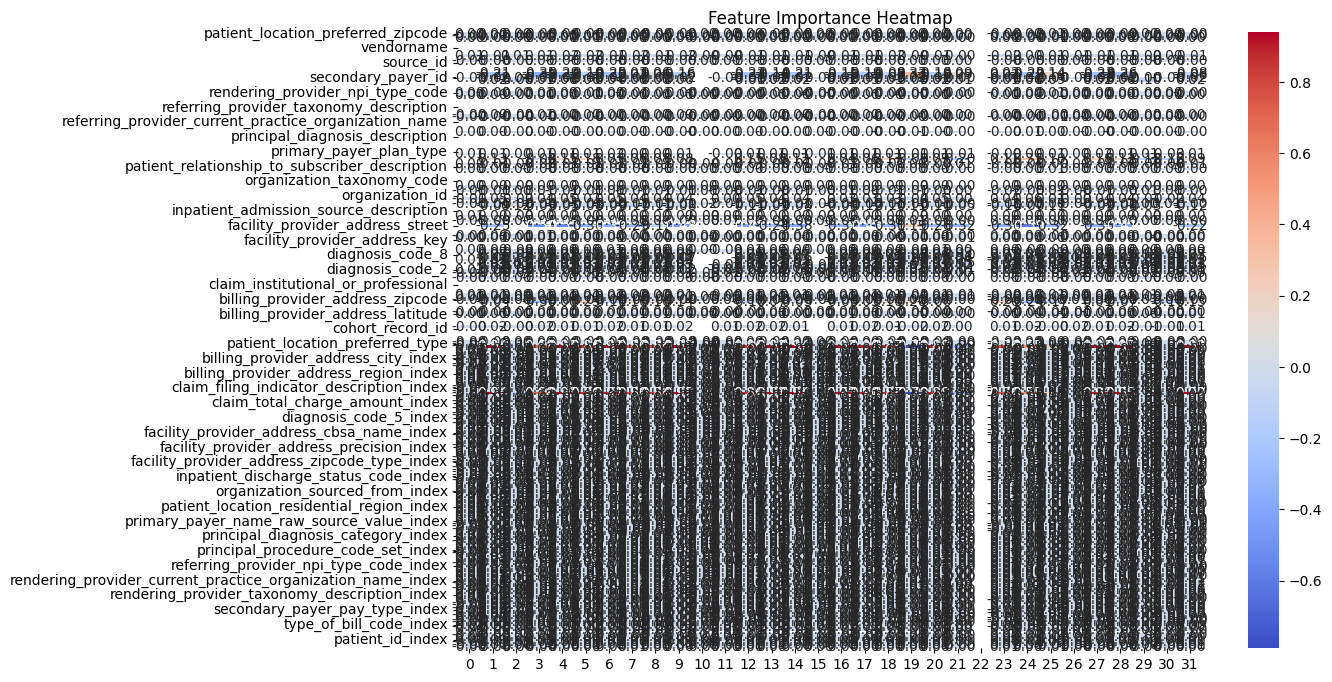

In [9]:
mx_submits_fe.plot_feature_importance_heatmap()

In [ ]:
%autoreload 2